# Asset Pricing - OSE Bootcamp - Scott Condie
## Jeanne Sorin

## Section 2: The Lucas Tree Model of Asset Pricing

In [144]:
import pandas as pd
import numpy as np
from fredapi import Fred
from scipy.optimize import broyden1
import scipy as sp



### Download data
fred = Fred(api_key='abbf257e9c218db2f4f1c220f837bc16')
PCECC96 = fred.get_series('PCECC96')
WILL5000 = fred.get_series('WILL5000INDFC')
GDPDEF = fred.get_series('GDPDEF')
TB3MS = fred.get_series('TB3MS')



In [70]:
### Transform the Wilshire 5000 series and the T-Bill series into quarterly data
WILL5000Q = WILL5000.resample('Q', how='mean', fill_method='bfill')
TB3MSQ = TB3MS.resample('Q', how='mean', fill_method='bfill')

### Shift
WILL5000Q = WILL5000Q.shift(1, freq='D')
TB3MSQ = TB3MSQ.shift(1, freq='D')
###

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).mean().bfill()
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).mean().bfill()
  This is separate from the ipykernel package so we can avoid doing imports until


In [394]:
### Create dataframe
data = pd.DataFrame()
data.insert(0, "Consommation", PCECC96)
data.insert(1, "Return", WILL5000Q)
data.insert(2, "Deflator", GDPDEF)
data.insert(3, "TBill", TB3MSQ)


In [395]:
### Compute index
data.insert(4, "RealReturn", ((data.Return.pct_change()+1) / (data.Deflator.pct_change()+1)))
data.insert(5, "RealTBill", ((data.TBill.pct_change()+1) / (data.Deflator.pct_change()+1)))

### Drop NA
dataset = data.dropna("index")
dataset



,Consommation,Return,Deflator,TBill,RealReturn,RealTBill
1971-04-01,3185.993,1.080000,22.685,3.840000,1.066003,0.708014
1971-07-01,3211.394,1.136667,22.916,4.250000,1.041860,1.095614
1971-10-01,3264.679,1.113333,23.107,5.010000,0.971376,1.169079
1972-01-01,3307.767,1.113333,23.458,4.230000,0.985037,0.831678
1972-04-01,3370.736,1.240000,23.604,3.436667,1.106883,0.807425
1972-07-01,3422.682,1.280000,23.830,3.770000,1.022468,1.086589
1972-10-01,3503.001,1.293333,24.134,4.220000,0.997689,1.105264
1973-01-01,3566.957,1.356667,24.412,4.863333,1.037024,1.139325
1973-04-01,3565.349,1.306667,24.787,5.700000,0.948574,1.154304
1973-07-01,3577.898,1.196667,25.270,6.603333,0.898312,1.136337


### Question 1

In [350]:
β = 0.99


def euler_error(γ, dataframe):
    
    # Subset panda dataset 
    extract = pd.DataFrame()
    extract.insert(0, "RealReturn", dataset.RealReturn)
    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(1, "m", (dataframe.Consommation.pct_change()+1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em", Em)
    Er = extract.RealReturn.mean()
    print("Er is", Er)
    
    
    # Compute covariance
    Cov = extract.cov()
    #print(Cov)
    
    # Compute error (equation 5)
    error = 1 - Cov["RealReturn"][1] - Em*Er
    print("error is", error)
    return(error)
euler_error(1.2, dataset)
 

Em 0.9812532644280597
Er is 1.0192010448476876
error is 4.618732132044556e-05


4.618732132044556e-05

In [351]:
sp.optimize.root(euler_error, 1.6, args=(dataset))

Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676042401933
Er is 1.0192010448476876
error is 0.003033905918468749
Em 0.9813055184874994
Er is 1.0192010448476876
error is -7.913506702372786e-06
Em 0.981297855273318
Er is 1.0192010448476876
error is 2.053868786155988e-08
Em 0.9812978751107767
Er is 1.0192010448476876
error is 1.376676550535194e-13
Em 0.9812978751109088
Er is 1.0192010448476876
error is 8.881784197001252e-16


    fjac: array([[-1.]])
     fun: 8.881784197001252e-16
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.37667655e-13])
       r: array([-0.00748898])
  status: 1
 success: True
       x: array([1.19383238])

## Question 2

**How would you determine if this parameter is reasonable?**

## Question 3

In [391]:
β = 0.99


def rf_error(γ, dataframe):
    print("γ is ", γ)
    # Subset panda dataset 
    extract = pd.DataFrame()
    extract.insert(0, "RealTBill", dataset.RealTBill)
    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(1, "m", (dataframe.Consommation.pct_change() +1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em is ", Em)
    Erf = extract.RealTBill.mean()
    print("Erf is ", Erf)
    # Compute covariance
    #Cov = extract.cov()
    #print(Cov)
    
    # Compute error (equation 5)
    error = (Erf)*Em-1
    print("Error is ", error)
    return(error)

In [392]:
rf_error(1.4, dataset)
root(rf_error, 1.4, args=(dataset))

γ is  1.4
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.40000002]
Em is  0.9798085743820396
Erf is  1.0327741979355558
Error is  0.011921014537791264
γ is  [3.00000922]
Em is  0.9683841903889493
Erf is  1.0327741979355558
Error is  0.00012220552241970495
γ is  [3.01658123]
Em is  0.9682670934570038
Erf is  1.0327741979355558
Error is  1.2708324490517953e-06
γ is  [3.01675538]
Em is  0.9682658630864546
Erf is  1.0327741979355558
Error is  1.3749179572641879e-10
γ is  [3.01675539]
Em is  0.9682658629533254
Erf is  1.0327741979355558
Error is  -5.551115123125783e-16


    fjac: array([[-1.]])
     fun: -5.551115123125783e-16
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.37491796e-10])
       r: array([0.00729674])
  status: 1
 success: True
       x: array([3.01675539])

## Question 4



In [387]:
def overall_error(X, dataframe):
    β, γ = X
    print("X guess is ", X)
    extract = pd.DataFrame()
    extract.insert(0, "RealReturn", dataset.RealReturn)
    extract.insert(1, "RealTBill", dataset.RealTBill)

    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(2, "m", (dataframe.Consommation.pct_change() +1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em is ", Em)
    Er = extract.RealReturn.mean() 
    print("Er is ", Er)
    Erf = extract.RealTBill.mean()
    print("Erf is ", Erf)

    # Compute covariance
    Cov = extract.cov()
    #print(Cov)
    
    
    # Compute error (equation 5)
    error1 = 1 - Cov["RealReturn"][2] - Em*Er
    error2 = (Erf)*Em-1
    if γ < 0:
        error1 = 5000000000000000
        error2 = 5000000000000000
    if β > 1.:
        error1 = 5000000000000000
        error2 = 5000000000000000
    error1 = np.linalg.norm(error1)
    error2 = np.linalg.norm(error2)
    print("Error 1 is ", error1)
    print("Error 2 is ", error2)
    return [error1, error2]

In [390]:
#overall_error([0.99, 3.1], dataset)
root(overall_error, [0.98, 3.1], args=(dataset))

X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98000001 3.1       ]
Em is  0.9579035301057206
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061357332497924
Error 2 is  0.01070194999542684
X guess is  [0.98       3.10000005]
Em is  0.9579035155091234
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.02406137220932303
Error 2 is  0.010701965070415764
X guess is  [   0.16613403 -112.25104381]
Em is  0.4793783521229497
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  

    fjac: array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])
     fun: array([0.02406137, 0.01070196])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([-0.02458139,  0.00944653])
       r: array([ 4.25267472e+15,  3.12954305e+13, -5.68032265e-05])
  status: 5
 success: False
       x: array([0.98, 3.1 ])

In [379]:
### Plot the result
N = 25
gamma_v = np.linspace(0.0, 5., N)
beta_v = np.linspace(0.0, 1., N)

matrix1 = np.zeros((N, N))
matrix2 = np.zeros((N, N))

for i in range(N):
    print("Range of gamma is ", i)
    for j in range(N):
        g = gamma_v[j]
        b = beta_v[i]
        matrix1[i,j] = overall_error([b,g], dataset)[0]
        matrix2[i,j] = overall_error([b,g], dataset)[1]


Range of gamma is  0
X guess is  [0.0, 0.0]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.0]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.20833333333333334]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.20833333333333334]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.4166666666666667]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.4166666666666667]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.625]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.625]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979

Error 1 is  0.9584495500743848
Error 2 is  0.9578817006366016
X guess is  [0.041666666666666664, 2.916666666666667]
Em is  0.04078171147922744
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9584495500743848
Error 2 is  0.9578817006366016
X guess is  [0.041666666666666664, 3.125]
Em is  0.040719765595279796
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585136996288031
Error 2 is  0.9579456767472111
X guess is  [0.041666666666666664, 3.125]
Em is  0.040719765595279796
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585136996288031
Error 2 is  0.9579456767472111
X guess is  [0.041666666666666664, 3.3333333333333335]
Em is  0.040657986276169525
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585776783752417
Error 2 is  0.9580094808339542
X guess is  [0.041666666666666664, 3.3333333333333335]
Em is  0.040657986276169525
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585776783752417
Error 2

Em is  0.08131597255233905
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9171553567504834
Error 2 is  0.9160189616679084
X guess is  [0.08333333333333333, 3.3333333333333335]
Em is  0.08131597255233905
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9171553567504834
Error 2 is  0.9160189616679084
X guess is  [0.08333333333333333, 3.541666666666667]
Em is  0.08119274625833647
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9172829734417234
Error 2 is  0.9161462266048614
X guess is  [0.08333333333333333, 3.541666666666667]
Em is  0.08119274625833647
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9172829734417234
Error 2 is  0.9161462266048614
X guess is  [0.08333333333333333, 3.75]
Em is  0.08106985152607177
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.917410250142596
Error 2 is  0.9162731491134066
X guess is  [0.08333333333333333, 3.75]
Em is  0.08106985152607177
Er is  1.019201044847687

Error 1 is  0.8303994971210787
Error 2 is  0.8281366786239075
X guess is  [0.16666666666666666, 0.20833333333333334]
Em is  0.16640938718224693
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8303994971210787
Error 2 is  0.8281366786239075
X guess is  [0.16666666666666666, 0.4166666666666667]
Em is  0.16615279658401344
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8306651283671088
Error 2 is  0.8284016787731959
X guess is  [0.16666666666666666, 0.4166666666666667]
Em is  0.16615279658401344
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8306651283671088
Error 2 is  0.8284016787731959
X guess is  [0.16666666666666666, 0.625]
Em is  0.1658968932160213
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8309300546459704
Error 2 is  0.8286659691688231
X guess is  [0.16666666666666666, 0.625]
Em is  0.1658968932160213
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8309300546459704
Error 2 is  0.82

Em is  0.20641661253330837
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7896507759285745
Error 2 is  0.7868182485503381
X guess is  [0.20833333333333331, 1.4583333333333335]
Em is  0.20610014892940495
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7899784302310399
Error 2 is  0.7871450839950351
X guess is  [0.20833333333333331, 1.4583333333333335]
Em is  0.20610014892940495
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7899784302310399
Error 2 is  0.7871450839950351
X guess is  [0.20833333333333331, 1.6666666666666667]
Em is  0.20578453412910935
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7903052139300698
Error 2 is  0.7874710428172671
X guess is  [0.20833333333333331, 1.6666666666666667]
Em is  0.20578453412910935
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7903052139300698
Error 2 is  0.7874710428172671
X guess is  [0.20833333333333331, 1.875]
Em is  0.20546976610852943
Er is 

Error 1 is  0.7487573549478883
Error 2 is  0.7453553525287085
X guess is  [0.25, 2.0833333333333335]
Em is  0.246187011421651
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7491474134803984
Error 2 is  0.7457444067368528
X guess is  [0.25, 2.0833333333333335]
Em is  0.246187011421651
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7491474134803984
Error 2 is  0.7457444067368528
X guess is  [0.25, 2.291666666666667]
Em is  0.24581131481872717
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7495364348120246
Error 2 is  0.7461324164946046
X guess is  [0.25, 2.291666666666667]
Em is  0.24581131481872717
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7495364348120246
Error 2 is  0.7461324164946046
X guess is  [0.25, 2.5]
Em is  0.2454366271200864
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7499244214318739
Error 2 is  0.7465193842820447
X guess is  [0.25, 2.5]
Em is  0.2454366271200864
Er is

Error 1 is  0.7091468505206926
Error 2 is  0.705171904456211
X guess is  [0.29166666666666663, 2.916666666666667]
Em is  0.2854719803545924
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7091468505206926
Error 2 is  0.705171904456211
X guess is  [0.29166666666666663, 3.125]
Em is  0.2850383591669583
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7095958974016212
Error 2 is  0.7056197372304778
X guess is  [0.29166666666666663, 3.125]
Em is  0.2850383591669583
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7095958974016212
Error 2 is  0.7056197372304778
X guess is  [0.29166666666666663, 3.3333333333333335]
Em is  0.2846059039331866
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7100437486266921
Error 2 is  0.7060663658376793
X guess is  [0.29166666666666663, 3.3333333333333335]
Em is  0.2846059039331866
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7100437486266921
Error 2 is  0.706066365

Em is  0.32427940610428707
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6696410005703841
Error 2 is  0.6650925964536265
X guess is  [0.3333333333333333, 3.9583333333333335]
Em is  0.32378915030413563
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6701487506453102
Error 2 is  0.6655989199944112
X guess is  [0.3333333333333333, 3.9583333333333335]
Em is  0.32378915030413563
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6701487506453102
Error 2 is  0.6655989199944112
X guess is  [0.3333333333333333, 4.166666666666667]
Em is  0.3233002145266922
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6706551472124349
Error 2 is  0.6661038802498023
X guess is  [0.3333333333333333, 4.166666666666667]
Em is  0.3233002145266922
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6706551472124349
Error 2 is  0.6661038802498023
X guess is  [0.3333333333333333, 4.375]
Em is  0.3228125956775714
Er is  1.0192010

Em is  0.3637127413425287
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6294870406139893
Error 2 is  0.6243668652810277
X guess is  [0.375, 4.166666666666667]
Em is  0.3637127413425287
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6294870406139893
Error 2 is  0.6243668652810277
X guess is  [0.375, 4.375]
Em is  0.36316417013726765
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6300552176654628
Error 2 is  0.6249334154675517
X guess is  [0.375, 4.375]
Em is  0.36316417013726765
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6300552176654628
Error 2 is  0.6249334154675517
X guess is  [0.375, 4.583333333333334]
Em is  0.36261707700844353
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6306218792265383
Error 2 is  0.625498439134869
X guess is  [0.375, 4.583333333333334]
Em is  0.36261707700844353
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6306218792265383
Error 2 is 

Error 1 is  0.5864148672086175
Error 2 is  0.5807311330243075
X guess is  [0.41666666666666663, 3.541666666666667]
Em is  0.4059637312916822
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5864148672086175
Error 2 is  0.5807311330243075
X guess is  [0.41666666666666663, 3.75]
Em is  0.40534925763035906
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5870512507129799
Error 2 is  0.5813657455670329
X guess is  [0.41666666666666663, 3.75]
Em is  0.40534925763035906
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5870512507129799
Error 2 is  0.5813657455670329
X guess is  [0.41666666666666663, 3.9583333333333335]
Em is  0.4047364378801695
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.587685938306638
Error 2 is  0.5819986499930141
X guess is  [0.41666666666666663, 3.9583333333333335]
Em is  0.4047364378801695
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.587685938306638
Error 2 is  0.581998649

Em is  0.5
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4903994775761562
Error 2 is  0.4836129010322221
X guess is  [0.5, 0.0]
Em is  0.5
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4903994775761562
Error 2 is  0.4836129010322221
X guess is  [0.5, 0.20833333333333334]
Em is  0.49922816154674066
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.49119849136323646
Error 2 is  0.4844100358717228
X guess is  [0.5, 0.20833333333333334]
Em is  0.49922816154674066
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.49119849136323646
Error 2 is  0.4844100358717228
X guess is  [0.5, 0.4166666666666667]
Em is  0.4984583897520403
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4919953851013268
Error 2 is  0.4852050363195879
X guess is  [0.5, 0.4166666666666667]
Em is  0.4984583897520403
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4919953851013268
Error 2 is  0.4852050363195879
X g

Em is  0.5358603872164529
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4539439186007036
Error 2 is  0.4465772183870915
X guess is  [0.5416666666666666, 1.4583333333333335]
Em is  0.5358603872164529
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4539439186007036
Error 2 is  0.4465772183870915
X guess is  [0.5416666666666666, 1.6666666666666667]
Em is  0.535039788735684
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45479355621818174
Error 2 is  0.4474247113248947
X guess is  [0.5416666666666666, 1.6666666666666667]
Em is  0.535039788735684
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45479355621818174
Error 2 is  0.4474247113248947
X guess is  [0.5416666666666666, 1.875]
Em is  0.5342213918821767
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45564093572042463
Error 2 is  0.44826993047886876
X guess is  [0.5416666666666666, 1.875]
Em is  0.5342213918821767
Er is  1.0192010448476876
Er

Em is  0.5788549955225305
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4101022969683945
Error 2 is  0.40217349627822885
X guess is  [0.5833333333333333, 1.25]
Em is  0.577966515093263
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41102217260000884
Error 2 is  0.40309109594094694
X guess is  [0.5833333333333333, 1.25]
Em is  0.577966515093263
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41102217260000884
Error 2 is  0.40309109594094694
X guess is  [0.5833333333333333, 1.4583333333333335]
Em is  0.5770804170023343
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41193960464691104
Error 2 is  0.40400623518609813
X guess is  [0.5833333333333333, 1.4583333333333335]
Em is  0.5770804170023343
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41193960464691104
Error 2 is  0.40400623518609813
X guess is  [0.5833333333333333, 1.6666666666666667]
Em is  0.576196695561506
Er is  1.0192010448476876


Error 1 is  0.36598770492238875
Error 2 is  0.35749738438308665
X guess is  [0.625, 0.8333333333333334]
Em is  0.6211562828568968
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.36697854125182383
Error 2 is  0.35848581817983716
X guess is  [0.625, 0.8333333333333334]
Em is  0.6211562828568968
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.36697854125182383
Error 2 is  0.35848581817983716
X guess is  [0.625, 1.0416666666666667]
Em is  0.6202017809169966
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3679667467518516
Error 2 is  0.3594716031552455
X guess is  [0.625, 1.0416666666666667]
Em is  0.6202017809169966
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3679667467518516
Error 2 is  0.3594716031552455
X guess is  [0.625, 1.25]
Em is  0.6192498375999247
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.36895232778572384
Error 2 is  0.36045474565101454
X guess is  [0.625, 1.25]
Em is  0.6192

Em is  0.6646111863360538
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.32266051346843583
Error 2 is  0.3136067150927838
X guess is  [0.6666666666666666, 0.4166666666666667]
Em is  0.6646111863360538
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.32266051346843583
Error 2 is  0.3136067150927838
X guess is  [0.6666666666666666, 0.625]
Em is  0.6635875728640852
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.323720218583881
Error 2 is  0.31466387667529216
X guess is  [0.6666666666666666, 0.625]
Em is  0.6635875728640852
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.323720218583881
Error 2 is  0.31466387667529216
X guess is  [0.6666666666666666, 0.8333333333333334]
Em is  0.6625667017140231
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.32477711066861215
Error 2 is  0.3157182060584931
X guess is  [0.6666666666666666, 0.8333333333333334]
Em is  0.6625667017140231
Er is  1.0192010448476876
E

Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.27806592656622253
Error 2 is  0.2684516097956492
X guess is  [0.7083333333333333, 0.20833333333333334]
Em is  0.7072398955245497
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2791978627645847
Error 2 is  0.26958088415160686
X guess is  [0.7083333333333333, 0.20833333333333334]
Em is  0.7072398955245497
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2791978627645847
Error 2 is  0.26958088415160686
X guess is  [0.7083333333333333, 0.4166666666666667]
Em is  0.706149385482057
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2803267955602132
Error 2 is  0.270707134786083
X guess is  [0.7083333333333333, 0.4166666666666667]
Em is  0.706149385482057
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2803267955602132
Error 2 is  0.270707134786083
X guess is  [0.7083333333333333, 0.625]
Em is  0.7050617961680903
Er is  1.0192010448476876
Erf is  1.032774

Error 1 is  0.3044179325893258
Error 2 is  0.2947340733210856
Range of gamma is  18
X guess is  [0.75, 0.0]
Em is  0.75
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2355992163642343
Error 2 is  0.22541935154833315
X guess is  [0.75, 0.0]
Em is  0.75
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2355992163642343
Error 2 is  0.22541935154833315
X guess is  [0.75, 0.20833333333333334]
Em is  0.7488422423201114
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.23679773704485452
Error 2 is  0.22661505380758384
X guess is  [0.75, 0.20833333333333334]
Em is  0.7488422423201114
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.23679773704485452
Error 2 is  0.22661505380758384
X guess is  [0.75, 0.4166666666666667]
Em is  0.7476875846280602
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.23799307765199074
Error 2 is  0.22780755447938217
X guess is  [0.75, 0.4166666666666667]
Em is  0.7476875846280602

Em is  0.7241429170027018
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2623740577596174
Error 2 is  0.2521238797018208
X guess is  [0.75, 4.791666666666667]
Em is  0.7241429170027018
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2623740577596174
Error 2 is  0.2521238797018208
X guess is  [0.75, 5.0]
Em is  0.7230546223489439
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2635013403886982
Error 2 is  0.2532478423399732
X guess is  [0.75, 5.0]
Em is  0.7230546223489439
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2635013403886982
Error 2 is  0.2532478423399732
Range of gamma is  19
X guess is  [0.7916666666666666, 0.0]
Em is  0.7916666666666667
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.1931325061622472
Error 2 is  0.1823870933010182
X guess is  [0.7916666666666666, 0.0]
Em is  0.7916666666666667
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.1931325061622472
E

Em is  0.7678380095008936
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.21780597462953333
Error 2 is  0.20699671559328092
X guess is  [0.7916666666666666, 4.166666666666667]
Em is  0.7678380095008936
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.21780597462953333
Error 2 is  0.20699671559328092
X guess is  [0.7916666666666666, 4.375]
Em is  0.7666799147342319
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2190054595159766
Error 2 is  0.20819276598705327
X guess is  [0.7916666666666666, 4.375]
Em is  0.7666799147342319
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2190054595159766
Error 2 is  0.20819276598705327
X guess is  [0.7916666666666666, 4.583333333333334]
Em is  0.7655249403511585
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.2202017450338033
Error 2 is  0.2093855937291681
X guess is  [0.7916666666666666, 4.583333333333334]
Em is  0.7655249403511585
Er is  1.0192010448476876
E

Em is  0.8119274625833643
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.17282973441723493
Error 2 is  0.1614622660486149
X guess is  [0.8333333333333333, 3.75]
Em is  0.8106985152607181
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.17410250142596007
Error 2 is  0.16273149113406593
X guess is  [0.8333333333333333, 3.75]
Em is  0.8106985152607181
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.17410250142596007
Error 2 is  0.16273149113406593
X guess is  [0.8333333333333333, 3.9583333333333335]
Em is  0.809472875760339
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.17537187661327558
Error 2 is  0.16399729998602808
X guess is  [0.8333333333333333, 3.9583333333333335]
Em is  0.809472875760339
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.17537187661327558
Error 2 is  0.16399729998602808
X guess is  [0.8333333333333333, 4.166666666666667]
Em is  0.8082505363167297
Er is  1.0192010448476876


Error 1 is  0.06573237555628764
Error 2 is  0.05329031855907518
X guess is  [0.9166666666666666, 0.20833333333333334]
Em is  0.9152516295023579
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.0671972341659336
Error 2 is  0.054751732431491784
X guess is  [0.9166666666666666, 0.20833333333333334]
Em is  0.9152516295023579
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.0671972341659336
Error 2 is  0.054751732431491784
X guess is  [0.9166666666666666, 0.4166666666666667]
Em is  0.9138403812120734
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.06865820601909978
Error 2 is  0.05620923325257832
X guess is  [0.9166666666666666, 0.4166666666666667]
Em is  0.9138403812120734
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.06865820601909978
Error 2 is  0.05620923325257832
X guess is  [0.9166666666666666, 0.625]
Em is  0.9124329126881175
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.0701153005528361


Em is  0.9480606850752632
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.03390077906278277
Error 2 is  0.020867386377161457
X guess is  [0.9583333333333333, 1.6666666666666667]
Em is  0.946608856993903
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.035403984078321016
Error 2 is  0.02236679695942867
X guess is  [0.9583333333333333, 1.6666666666666667]
Em is  0.946608856993903
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.035403984078321016
Error 2 is  0.02236679695942867
X guess is  [0.9583333333333333, 1.875]
Em is  0.9451609240992354
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.03690319396690522
Error 2 is  0.023862184693383415
X guess is  [0.9583333333333333, 1.875]
Em is  0.9451609240992354
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.03690319396690522
Error 2 is  0.023862184693383415
X guess is  [0.9583333333333333, 2.0833333333333335]
Em is  0.9437168771163287
Er is  1.01920104

Em is  0.9907997401598797
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.009676275542842117
Error 2 is  0.023272406958376957
X guess is  [1.0, 1.4583333333333335]
Em is  0.9892807148611441
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.008103534891009012
Error 2 is  0.021703596823831495
X guess is  [1.0, 1.4583333333333335]
Em is  0.9892807148611441
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.008103534891009012
Error 2 is  0.021703596823831495
X guess is  [1.0, 1.6666666666666667]
Em is  0.9877657638197248
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.006534973135664979
Error 2 is  0.020138994477117977
X guess is  [1.0, 1.6666666666666667]
Em is  0.9877657638197248
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.006534973135664979
Error 2 is  0.020138994477117977
X guess is  [1.0, 1.875]
Em is  0.9862548773209419
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.00497

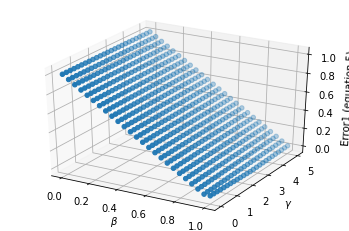

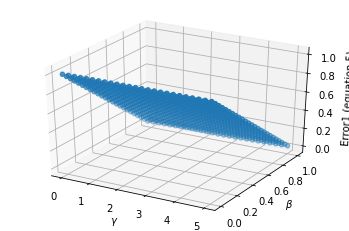

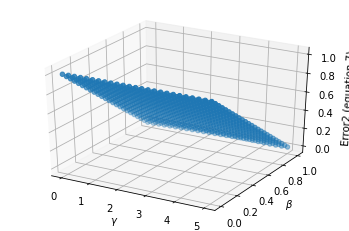

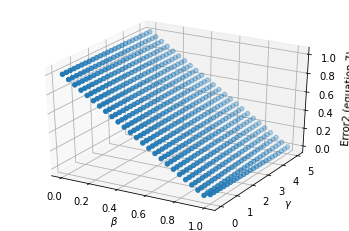

In [380]:
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

Gamma_v, Beta_v = np.meshgrid(gamma_v, beta_v)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
ax.scatter3D(Beta_v, Gamma_v, matrix1)
ax.set_xlabel(r'$β$')
ax.set_ylabel(r'$γ$')
ax.set_zlabel('Error1 (equation 5)')
#x.label("Beta")
#y.label("Gamma")
plt.show()

ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
ax.scatter3D(Gamma_v, Beta_v, matrix1)
ax.set_ylabel(r'$β$')
ax.set_xlabel(r'$γ$')
ax.set_zlabel('Error1 (equation 5)')
#x.label("Beta")
#y.label("Gamma")
plt.show()

bx = plt.axes(projection='3d')

bx = plt.axes(projection='3d')
bx.scatter3D(Gamma_v, Beta_v, matrix2)
bx.set_ylabel(r'$β$')
bx.set_xlabel(r'$γ$')
bx.set_zlabel('Error2 (equation 7)')
plt.show()


bx = plt.axes(projection='3d')

bx = plt.axes(projection='3d')
bx.scatter3D(Beta_v, Gamma_v, matrix2)
bx.set_xlabel(r'$β$')
bx.set_ylabel(r'$γ$')
bx.set_zlabel('Error2 (equation 7)')
plt.show()


In [381]:
extract = pd.dataset()
extract.insert(0, "RealReturn", dataset.RealReturn)
extract.insert(1, "RealTBill", dataset.RealTBill)

    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(2, "m", (dataframe.Consommation.pct_change() +1)**(-γ)*β)


array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])